In [1]:
# Holt-Winter Seasonal Method
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci
from sklearn.linear_model import LinearRegression
from random import randrange
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from pylab import rcParams

In [2]:
# Cycle of demand data: cycle repeats after 1 year (52 weeks)
T = 52
f = 1/T

In [3]:
# Load data
data = pd.read_csv("product_demand_raw.csv",names=['demand'])
wk = list(np.arange(1,len(data)+1,1))
data['week'] = wk
data.head()

,demand,week
0,29030.001,1
1,28930.000,2
2,28830.000,3
3,29020.000,4
4,27000.000,5


In [4]:
# Load train data (70% of historical data)
df = pd.read_csv("product_demand_raw_0.7.csv", names = ['demand'])
wk = list(np.arange(1,len(df)+1,1))
df['week'] = wk
df.head()

,demand,week
0,29030.001,1
1,28930.000,2
2,28830.000,3
3,29020.000,4
4,27000.000,5


In [5]:
# x: week, y:demand (of train data)
x = df['week']
y = df['demand']
x.shape

(182,)

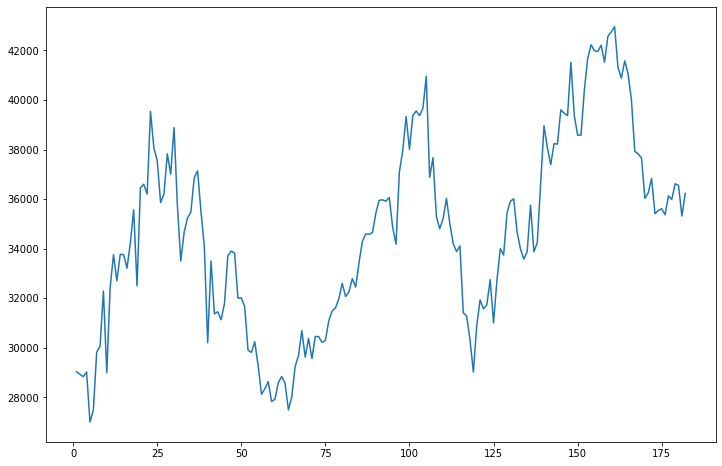

In [6]:
# Plot train data
plt.figure(figsize=(12,8))
plt.plot(df['week'], df['demand'])
plt.show()

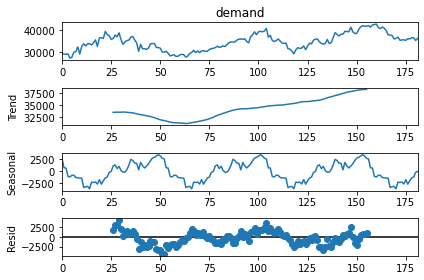

In [7]:
# Decomposition of time-series historical data
series = df['demand']
result = seasonal_decompose(series, model='additive', period=52)
result.plot()
plt.show()

In [8]:
# Print table of results of decomposition 
new_df_add = pd.concat([result.seasonal, result.trend, result.resid, result.observed], axis=1)
new_df_add.columns = ['seasonality', 'trend', 'residual', 'actual_values']
new_df_add.head()

,seasonality,trend,residual,actual_values
0,2473.695352,NaN,NaN,29030.001
1,664.802645,NaN,NaN,28930.000
2,609.513174,NaN,NaN,28830.000
3,-1110.437283,NaN,NaN,29020.000
4,-1221.015725,NaN,NaN,27000.000


In [9]:
# Create Holt-Winter Seasonal Method forecasting function 
def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_week):  
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_week).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red', label = 'fit1_fitted')
        fcast1.plot(style='--', marker='o', color='red', label = 'fcast1',legend=True)
    
    # Plot Fit data (curve-fitting), Forecast vs Actual
    plt.rcParams["figure.figsize"] = (14,7)
    plt.plot(data['week'],data['demand'], label = 'historical')
    plt.xlabel("week", fontsize = 15)
    plt.ylabel("demand", fontsize = 15)
    plt.title("Holt Winter Seasonal Method", fontsize =15)
    plt.legend()
    plt.show()

/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


The Root Mean Squared Error of additive trend, additive seasonal of period season_length=52 and a Box-Cox transformation nan


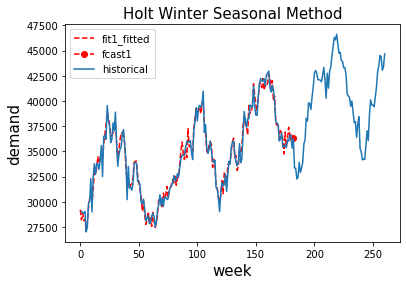

In [10]:
# Plot Forecast (dotted red line) vs Actual (blue line) based on the forecasting model
holt_win_sea(y, y,y,'additive',52, 1)

/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


The Root Mean Squared Error of additive trend, additive seasonal of period season_length=52 and a Box-Cox transformation 38075.97


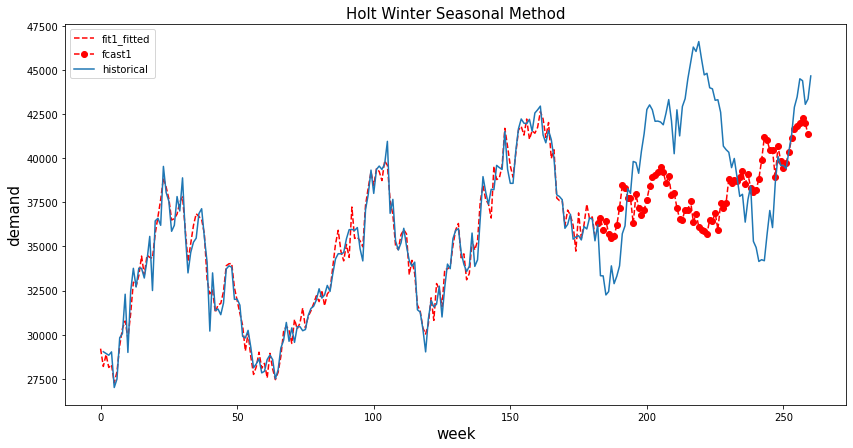

In [11]:
# Forecast for 30% of data
y_to_val = np.arange(183,261)
holt_win_sea(y, y,y_to_val,'additive',52,78)

In [12]:
# Get Predicted data in form of DataFrame
def holt_win_sea_data(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
    # Create DataFrame to store data
    df = pd.DataFrame()
    df['forecast 1'] = fcast1
    return(df)

/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(


The Root Mean Squared Error of additive trend, additive seasonal of period season_length=52 and a Box-Cox transformation 38075.97


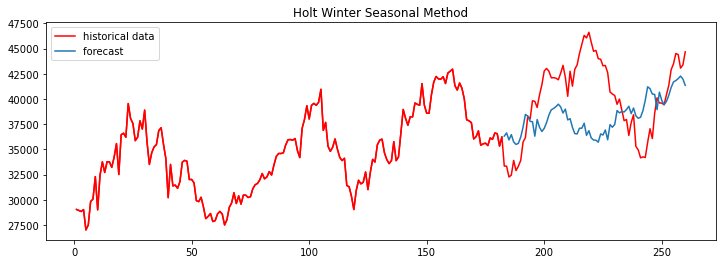

In [13]:
# Plot Forecast (blue line) vs Actual (red line)
fig,ax = plt.subplots(figsize=(12,4))
plt.plot(data['week'],data['demand'], color = 'red',label = 'historical data')
plt.plot(df['week'],df['demand'], color = 'red')
plt.plot(y_to_val,holt_win_sea_data(y, y,y_to_val,'additive',52, 78)['forecast 1'], label = 'forecast ')
# plt.plot(y_to_val,holt_win_sea_data(y, y,y_to_val,'additive',52, 78)['forecast 2'], label = 'forecast 2')
plt.title("Holt Winter Seasonal Method")
plt.legend()
plt.show()

In [14]:
# Save forecast data
holt_win_sea_data(y, y,y_to_val,'additive',52,78).to_csv("P_VaaT_Supporting_Documents_Q2.1_HWS_Forecast.csv")

The Root Mean Squared Error of additive trend, additive seasonal of period season_length=52 and a Box-Cox transformation 38075.97


/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/Users/annguyen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
